## Однофакторная линейная регрессия
Задание: выполнить регрессионный анализ и найти 95% доверительный интервал для углового коэффициента и свободного члена

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# данные
data = {'X':np.arange(20)+1, 
        'Y':np.array([17, 13, 22, 20, 20,
                      28, 26, 28, 34, 46,
                      44, 47, 45, 54, 55,
                      60, 58, 61, 64, 70])}
data = pd.DataFrame(data)
data

,X,Y
0,1,17
1,2,13
2,3,22
3,4,20
4,5,20
5,6,28
6,7,26
7,8,28
8,9,34
9,10,46


<AxesSubplot:title={'center':'Зависимость Y от X на графике'}, xlabel='X', ylabel='Y'>

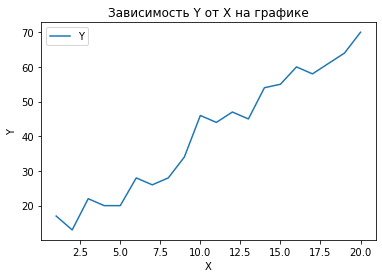

In [25]:
data.plot(x="X", y="Y", title="Зависимость Y от X на графике",
         xlabel='X', ylabel='Y')

Видно, что при возрастании X возрастает и Y, то есть зависимость есть, причем она близка к линейной (судя по графику). В связи с этим будем искать зависимость в виде: **y = a*x + b**

### Нахождение коэффициентов регрессии
Используется метод наименьших квадратов: будем минимизировать величину I, которая является *остаточной дисперсией*. Для нахождения коэффициентов a, b необходимо решить систему уравнений. 

In [34]:
# среднеее по Х, по Y, по XY, по X^2
x_mean = np.mean(data.X.values)
y_mean = np.mean(data.Y.values)
xy_mean = np.mean(data.X.values * data.Y.values)
x2_mean = np.mean(data.X.values**2)

In [61]:
A = np.array([[x2_mean, x_mean],
              [x_mean, 1]])
r = np.array([[xy_mean],
              [y_mean]])
res = np.linalg.inv(A)@r


# коэффициенты регрессии
a, b = res
print(f'y = {round(float(a),3)}*x + {round(float(b),3)} ---- уравнение регрессии')
f = lambda x: a*x + b

y = 2.973*x + 9.384 ---- уравнение регрессии


### Построение таблицы дисперсионного анализа

In [66]:
# сумма квадратов регрессии и средний квадрат регрессии
regression = np.sum((f(data.X.values)-y_mean)**2)
regression_mean = 1/1 * regression

# сумма квадратов остатка и средний квадрат остатка
rest = np.sum((f(data.X.values)-data.Y.values)**2)
rest_mean = rest / (len(data.Y.values)-2)

# сумма квадратов общей вариации и средний квадрат общей вариации
variance = np.sum((data.Y.values - y_mean)**2)
variance_mean = variance / (len(data.Y.values)-1)

table = pd.DataFrame({'Сумма квадратов': [regression, rest, variance],
                     'Степени свободы':  [1, len(data.Y.values)-2, len(data.Y.values)-1],
                     'Средний квадрат':  [regression_mean, rest_mean, variance_mean]},
                    index=['Регрессия', 'Остаток', 'Общая вариация'])
table

,Сумма квадратов,Степени свободы,Средний квадрат
Регрессия,5877.487218,1,5877.487218
Остаток,205.312782,18,11.406266
Общая вариация,6082.800000,19,320.147368


### Нахождение 95% доверительных интервалов для углового коэффициента и свободного члена регрессии
Поскольку коэффициенты регрессии (**a** и **b**, которые мы нашли ранее) найдены с помощью статистик, то и сами они являются статистиками. Поэтому для них можно найти доверительный интервал - интервал, который с заданной точностью (0.95) покрывает оцениваемые параметры (в данном случае оцениваемые параметры - это сами коэффициенты a и b)

In [75]:
from scipy.stats import t
Disp_for_a = rest_mean / np.sum((data.X.values-x_mean)**2)
Disp_for_b = np.sum(data.X.values**2) * rest_mean / (len(data.X.values) * np.sum((data.X.values-x_mean)**2))
t_for_095 = t.isf(q=0.05, df=len(data.Y.values)-2)

print('95% доверительный интервал для углового коэффициента:')
print(f'[{round(float(a-t_for_095*np.sqrt(Disp_for_a)),3)}, {round(float(a+t_for_095*np.sqrt(Disp_for_a)),3)}]')

print()

print('95% доверительный интервал для свободного члена:')
print(f'[{round(float(b-t_for_095*np.sqrt(Disp_for_b)),3)}, {round(float(b+t_for_095*np.sqrt(Disp_for_b)),3)}]')

95% доверительный интервал для углового коэффициента:
[2.746, 3.2]

95% доверительный интервал для свободного члена:
[6.664, 12.105]
